<a href="https://colab.research.google.com/github/Tilak-Shenoy/IE517/blob/Draft/IE517_F2x_HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install numpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import datasets

In [7]:
iris = datasets.load_iris()
X_iris, y_iris = iris.data, iris.target

In [8]:
X,y = X_iris[:,:2], y_iris

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state = 33)
print(X_train.shape, y_train.shape)

(112, 2) (112,)


In [12]:
print(X_test.shape, y_test.shape)

(38, 2) (38,)


In [13]:
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

Text(0, 0.5, 'Sepal Width')

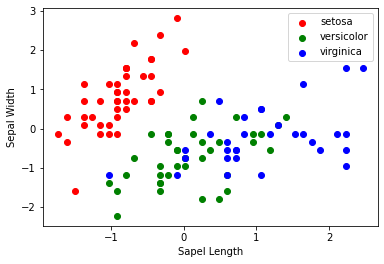

In [15]:
import matplotlib.pyplot as plt
colors = ['red', 'green', 'blue']
for i in range(len(colors)):
  xs = X_train[:, 0][y_train == i]
  ys = X_train[:,1][y_train == i]
  plt.scatter(xs, ys, c=colors[i])
plt.legend(iris.target_names)
plt.xlabel('Sapel Length')
plt.ylabel('Sepal Width')

In [17]:
print("My name is Tilak Shenoy")
print("My NetID is: tshenoy2")
print("I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.")

My name is Tilak Shenoy
My NetID is: tshenoy2
I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.


In [39]:
import pandas as pd
import numpy as np
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header = None)
df.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [21]:
y = df.iloc[0:400, 4].values
y = np.where(y == 'Iris-setosa',-1,1)

X = df.iloc[0:100, [0,2]].values

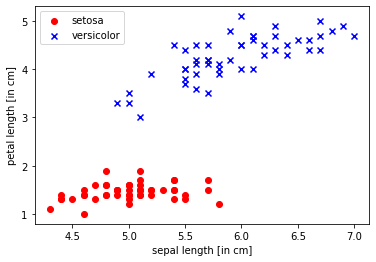

In [24]:
plt.scatter(X[:50,0], X[:50,1], color = 'red', marker = 'o',label= 'setosa')
plt.scatter(X[50:100, 0], X[50:100, 1], color= 'blue', marker = 'x', label = 'versicolor')
plt.xlabel('sepal length [in cm]')
plt.ylabel('petal length [in cm]')
plt.legend(loc = 'upper left')
plt.show()

In [25]:
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier()
clf.fit(X_train, y_train)

SGDClassifier()

In [26]:
y_pred = clf.predict(X_test)

In [28]:
print(clf.coef_)

[[-30.85615155  16.8628363 ]
 [ -2.83639939  -1.71098587]
 [  7.59744948  -1.32942325]]


In [29]:
print(clf.intercept_)

[-18.08625746  -3.568916    -8.06788662]


In [35]:
x_min, x_max = X_train[:,0].min() - 0.5, X_train[:,0].max() + 0.5
y_min, y_max = X_train[:,1].min() - .5, X_train[:,1].max() + .5

In [44]:
# Xs = np.arange(x_min, x_max, 0.5)
# fig, axes = plt.subplots(1,3)
# fig.set_size_inches(10,6)
# for i in [0,1,2]:
#   axes[i].set_aspect('equal')
#   axes[i].set_title('Class' + str(i) + ' versus the rest')
#   axes[i].set_xlabel('Sepal length')
#   axes[i].set_ylabel('Sepal width')
#   axes[i].set_xlim(x_min, x_max)
#   axes[i].set_ylim(y_min, y_max)
#   sca(axes[i])
#   plt.scatter(X_train[:,0], X_train[:,1], c=y_train, cmap=plt.cm.prism)
#   ys = (-clf.intercept_[i] - Xs * clf.coef_[i,0]/clf.coef_[i,1])
#   plt.plot(xs, ys, hold = True)